<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Bank_marketing_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/Bank-Marketing-using-rough-set-approach/refs/heads/main/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
print(df.shape)

(11162, 17)


1. Basic Cleaning

In [ ]:
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("Total missing values in all columns:", missing_per_column.sum())

missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
Total missing values in all columns: 0
Missing values per row:
0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Length: 11162, dtype: int64
Total missing values in all rows: 0
Total missing values in the dataset: 0


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

# Total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

Duplicate rows (True means duplicate):
0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool
Total number of duplicate rows: 0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 50:
        print(df[col].unique())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

Unique values in column 'age':
Number of unique values: 76
------------------------------
Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
------------------------------
Unique values in column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']
------------------------------
Unique values in column 'default':
['no' 'yes']
------------------------------
Unique values in column 'balance':
Number of unique values: 3805
------------------------------
Unique values in column 'housing':
['yes' 'no']
------------------------------
Unique values in column 'loan':
['no' 'yes']
------------------------------
Unique values in column 'contact':
['unknown' 'cellular' 'telephone']
------------------------------
Unique values in column 'day':
[ 5  6  7  8  9 12 13 14 

2. Features Visualization

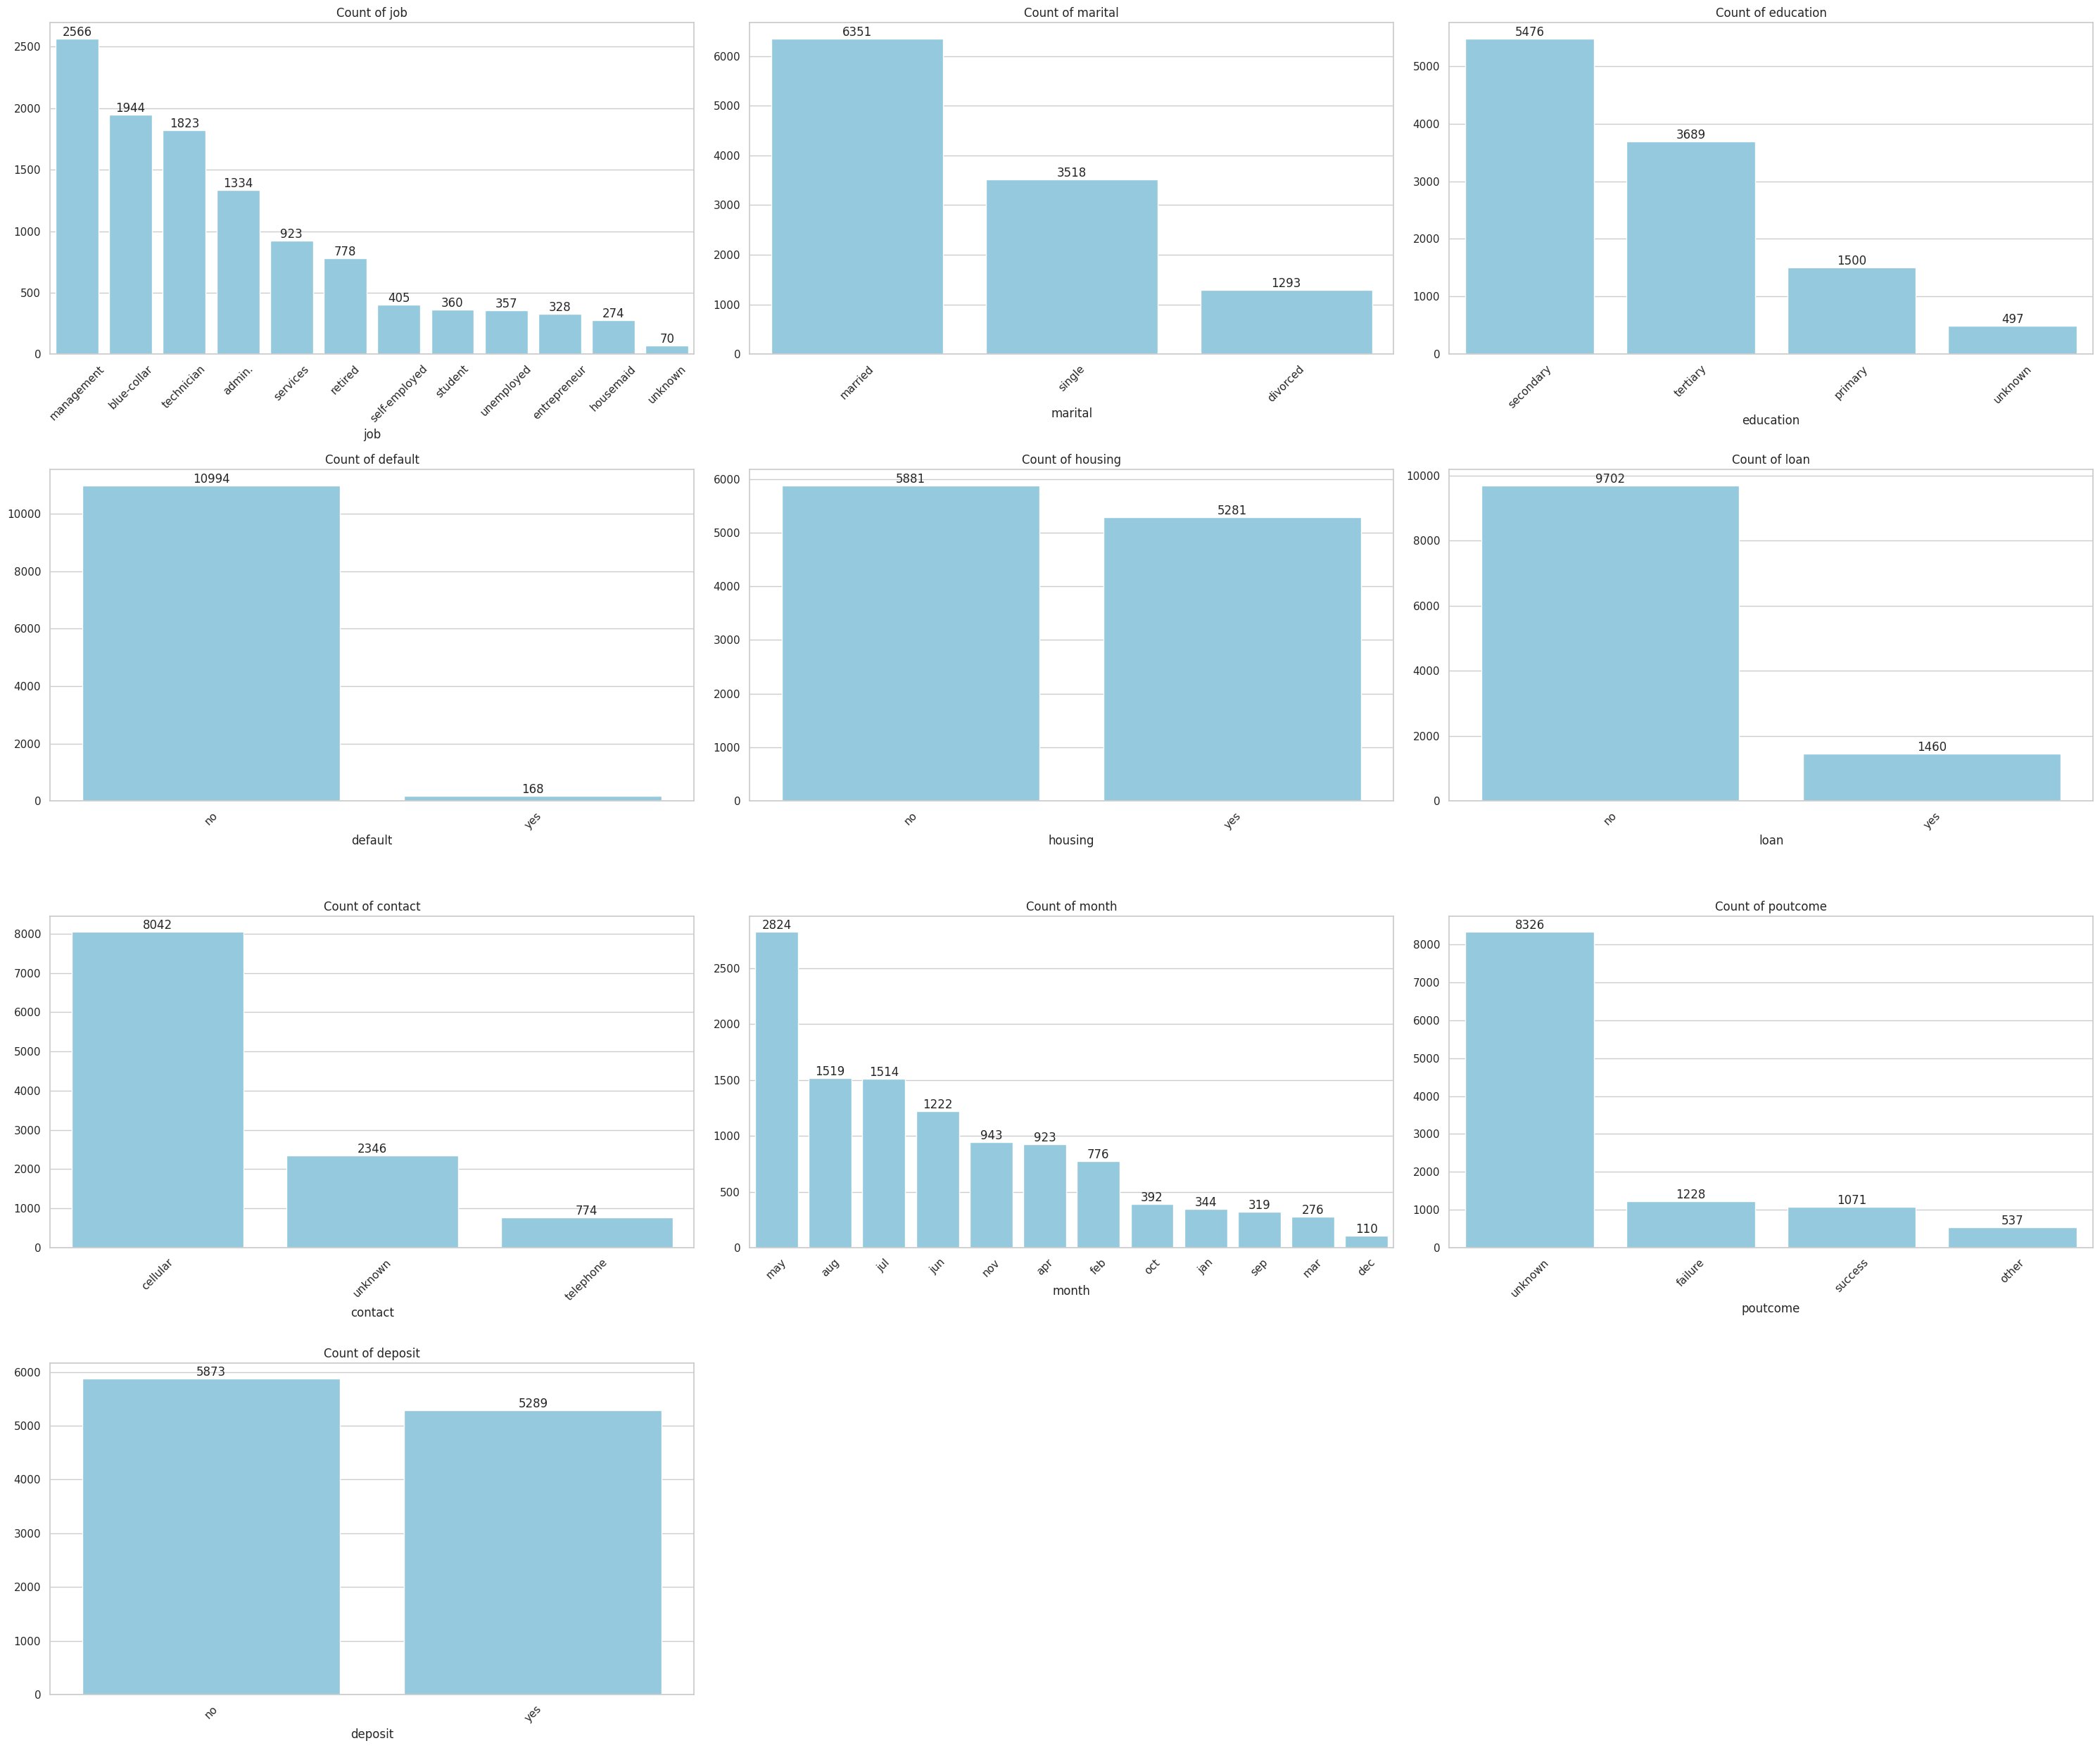

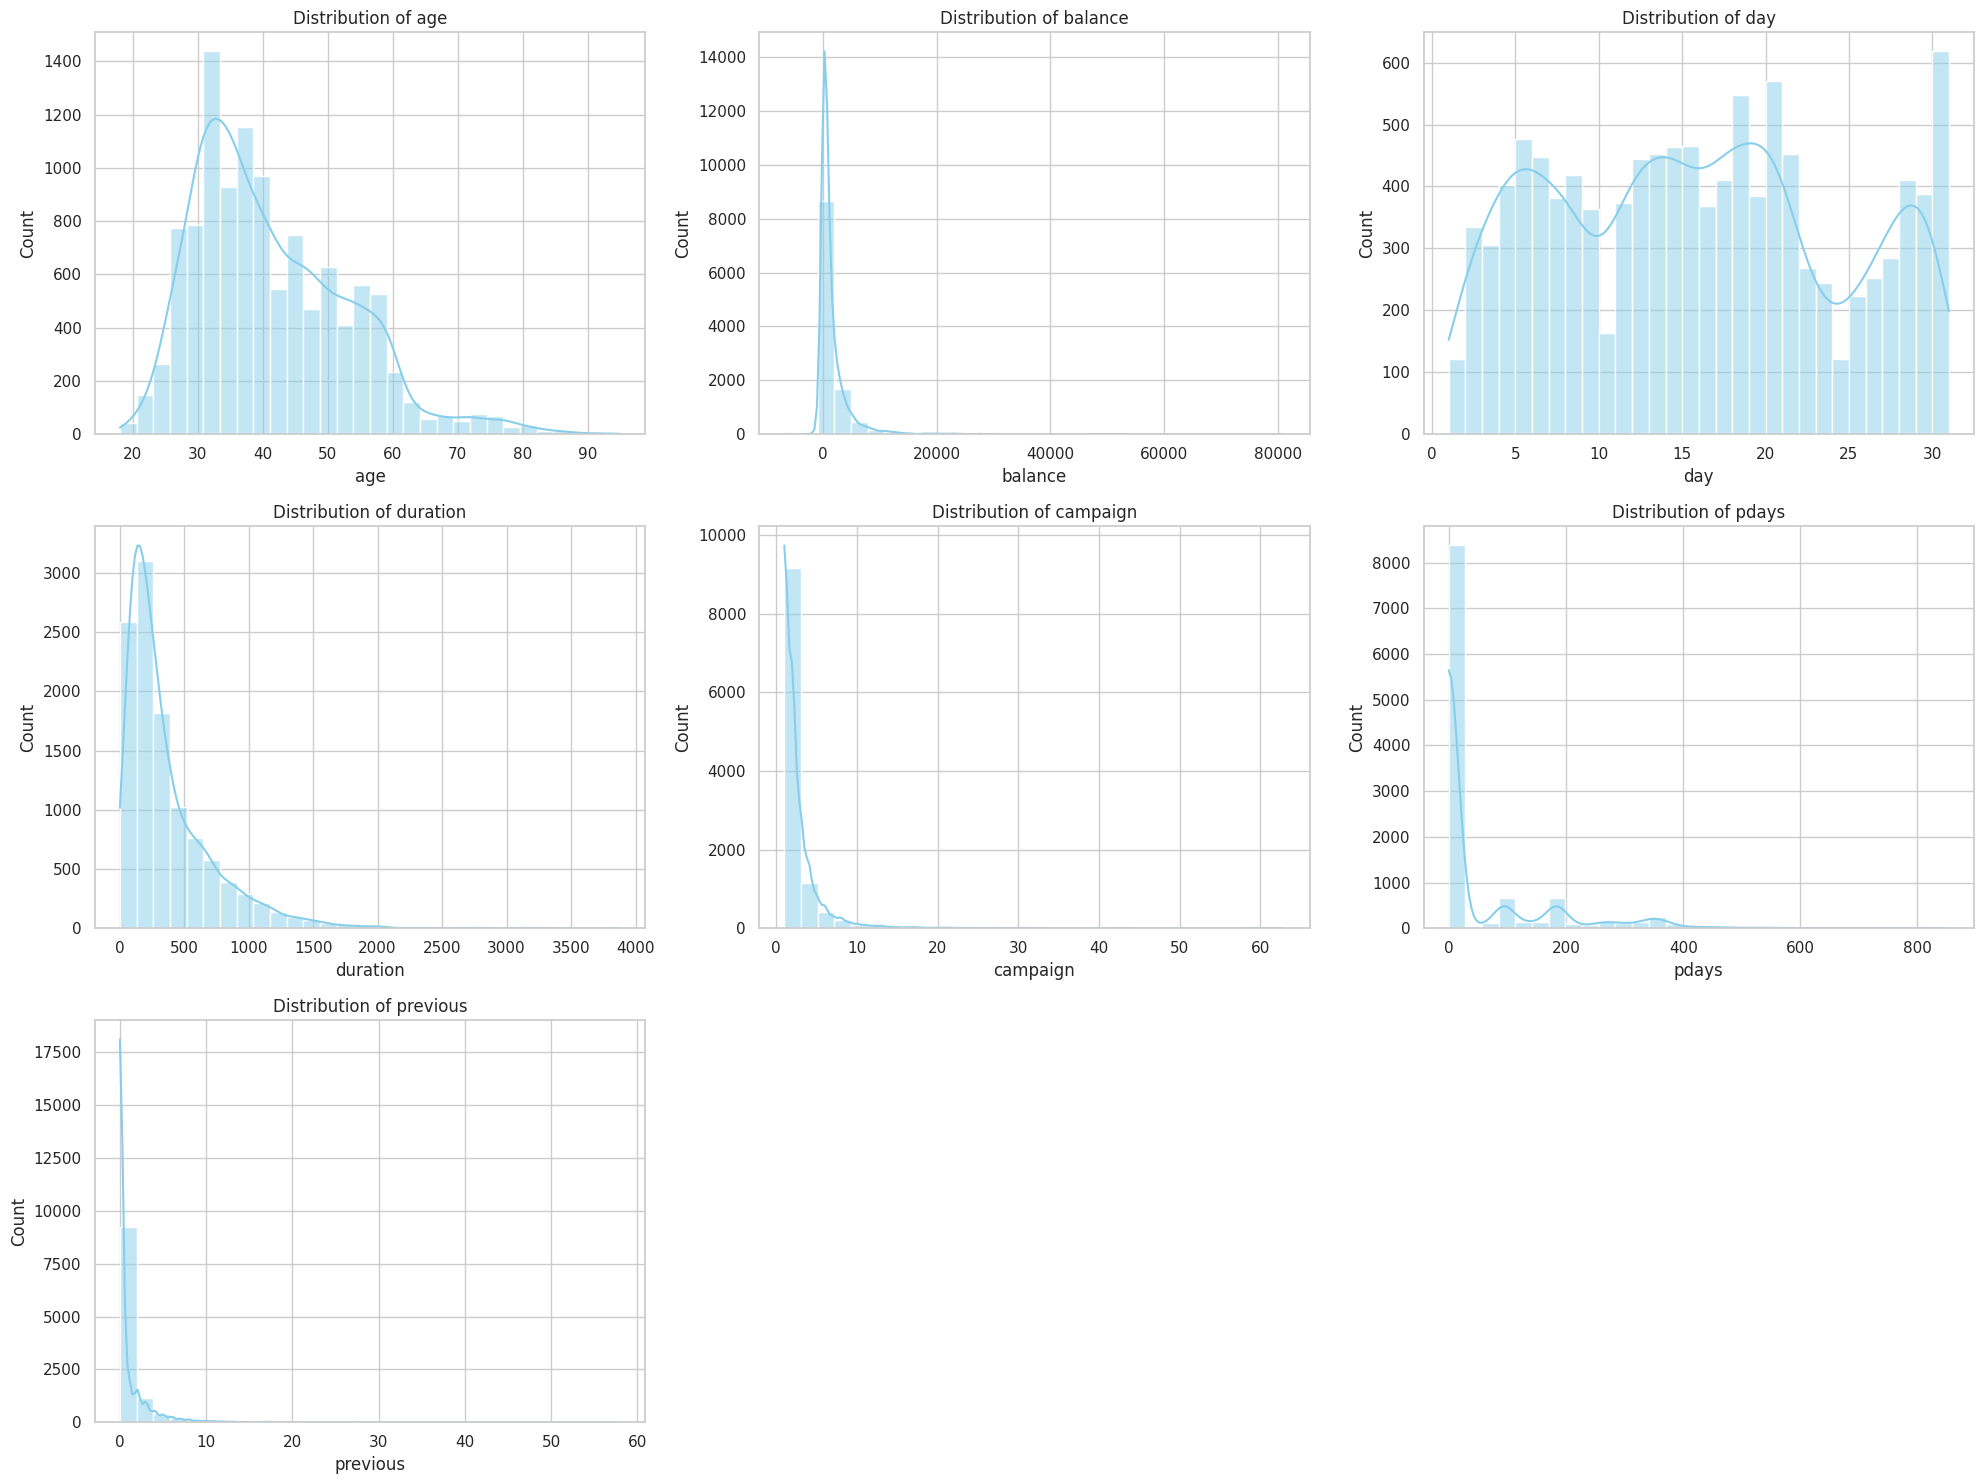

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")


categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome', 'deposit']

plt.figure(figsize=(30, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, color='skyblue')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    # Annotate counts on top of bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom')
plt.tight_layout()
plt.show()


numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()



### Observations from visualizations:

**Categorical Variables:**
- **Job:** The distribution of job types is varied, with 'management' and 'blue-collar' being the most frequent. 'unknown' job types are present but not in large numbers.
- **Marital:** The majority of individuals are 'married', followed by 'single' and 'divorced'.
- **Education:** 'secondary' education is the most common, followed by 'tertiary' and 'primary'. There is a notable number of 'unknown' education levels.
- **Default, Housing, Loan:** Most individuals have 'no' default, 'yes' housing loan, and 'no' personal loan.
- **Contact:** 'cellular' is the most frequent contact method, with a significant number of 'unknown' contact methods.
- **Month:** 'may' has the highest number of contacts, followed by 'jul' and 'aug'.
- **Poutcome:** 'unknown' is the most prevalent previous outcome, indicating a large number of individuals who were not contacted before. 'failure' and 'other' outcomes are also present, with 'success' being the least frequent.
- **Deposit:** The dataset is relatively balanced in terms of the target variable 'deposit', with slightly more 'no' than 'yes'.

**Numerical Variables:**
- **Age:** The age distribution is skewed towards younger and middle-aged adults.
- **Balance:** The balance distribution is heavily skewed to the right, with a large number of individuals having low or negative balances.
- **Day:** The distribution of contact days is somewhat uniform across the month.
- **Duration:** The duration of contact is right-skewed, with most contacts being short.
- **Campaign:** The number of contacts during this campaign is also right-skewed, with most individuals being contacted only a few times.
- **Pdays:** There is a large peak at -1, indicating individuals who were not previously contacted. For those who were contacted, the distribution of days since the last contact is right-skewed.
- **Previous:** The number of previous contacts is heavily skewed towards 0, indicating that most individuals had no previous contact.

3. Encoding Processes

In [ ]:
df_encoded = df.copy()

# Binary columns
binary_cols = ['default', 'housing', 'loan', 'deposit']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Multi-class categorical columns with ordered categories
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

poutcome_mapping = {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}

df_encoded['education'] = df_encoded['education'].map(education_mapping)
# df_encoded['month'] = df_encoded['month'].map(month_mapping)
df_encoded['poutcome'] = df_encoded['poutcome'].map(poutcome_mapping)

# Multi-class categorical columns without inherent order - using Frequency Encoding for 'job' and 'month'
job_frequency = df_encoded['job'].value_counts(normalize=True)
df_encoded['job'] = df_encoded['job'].map(job_frequency)

month_frequency = df_encoded['month'].value_counts(normalize=True)
df_encoded['month'] = df_encoded['month'].map(month_frequency)


# Remaining multi-class categorical columns without inherent order - use one-hot encoding
multi_class_cols_onehot = ['marital', 'contact']
df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols_onehot, drop_first=True, dtype=int)


# Make sure all numeric/object columns are numeric type
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numeric_cols] = df_encoded[numeric_cols].apply(pd.to_numeric)



display(df_encoded.head())

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single,contact_telephone,contact_unknown
0,59,0.119513,2,0,2343,1,0,5,0.253001,1042,1,-1,0,0,1,1,0,0,1
1,56,0.119513,2,0,45,0,0,5,0.253001,1467,1,-1,0,0,1,1,0,0,1
2,41,0.163322,2,0,1270,1,0,5,0.253001,1389,1,-1,0,0,1,1,0,0,1
3,55,0.082691,2,0,2476,1,0,5,0.253001,579,1,-1,0,0,1,1,0,0,1
4,54,0.119513,3,0,184,0,0,5,0.253001,673,2,-1,0,0,1,1,0,0,1


In [ ]:
print(df_encoded.dtypes)

age                    int64
job                  float64
education              int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                float64
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome               int64
deposit                int64
marital_married        int64
marital_single         int64
contact_telephone      int64
contact_unknown        int64
dtype: object


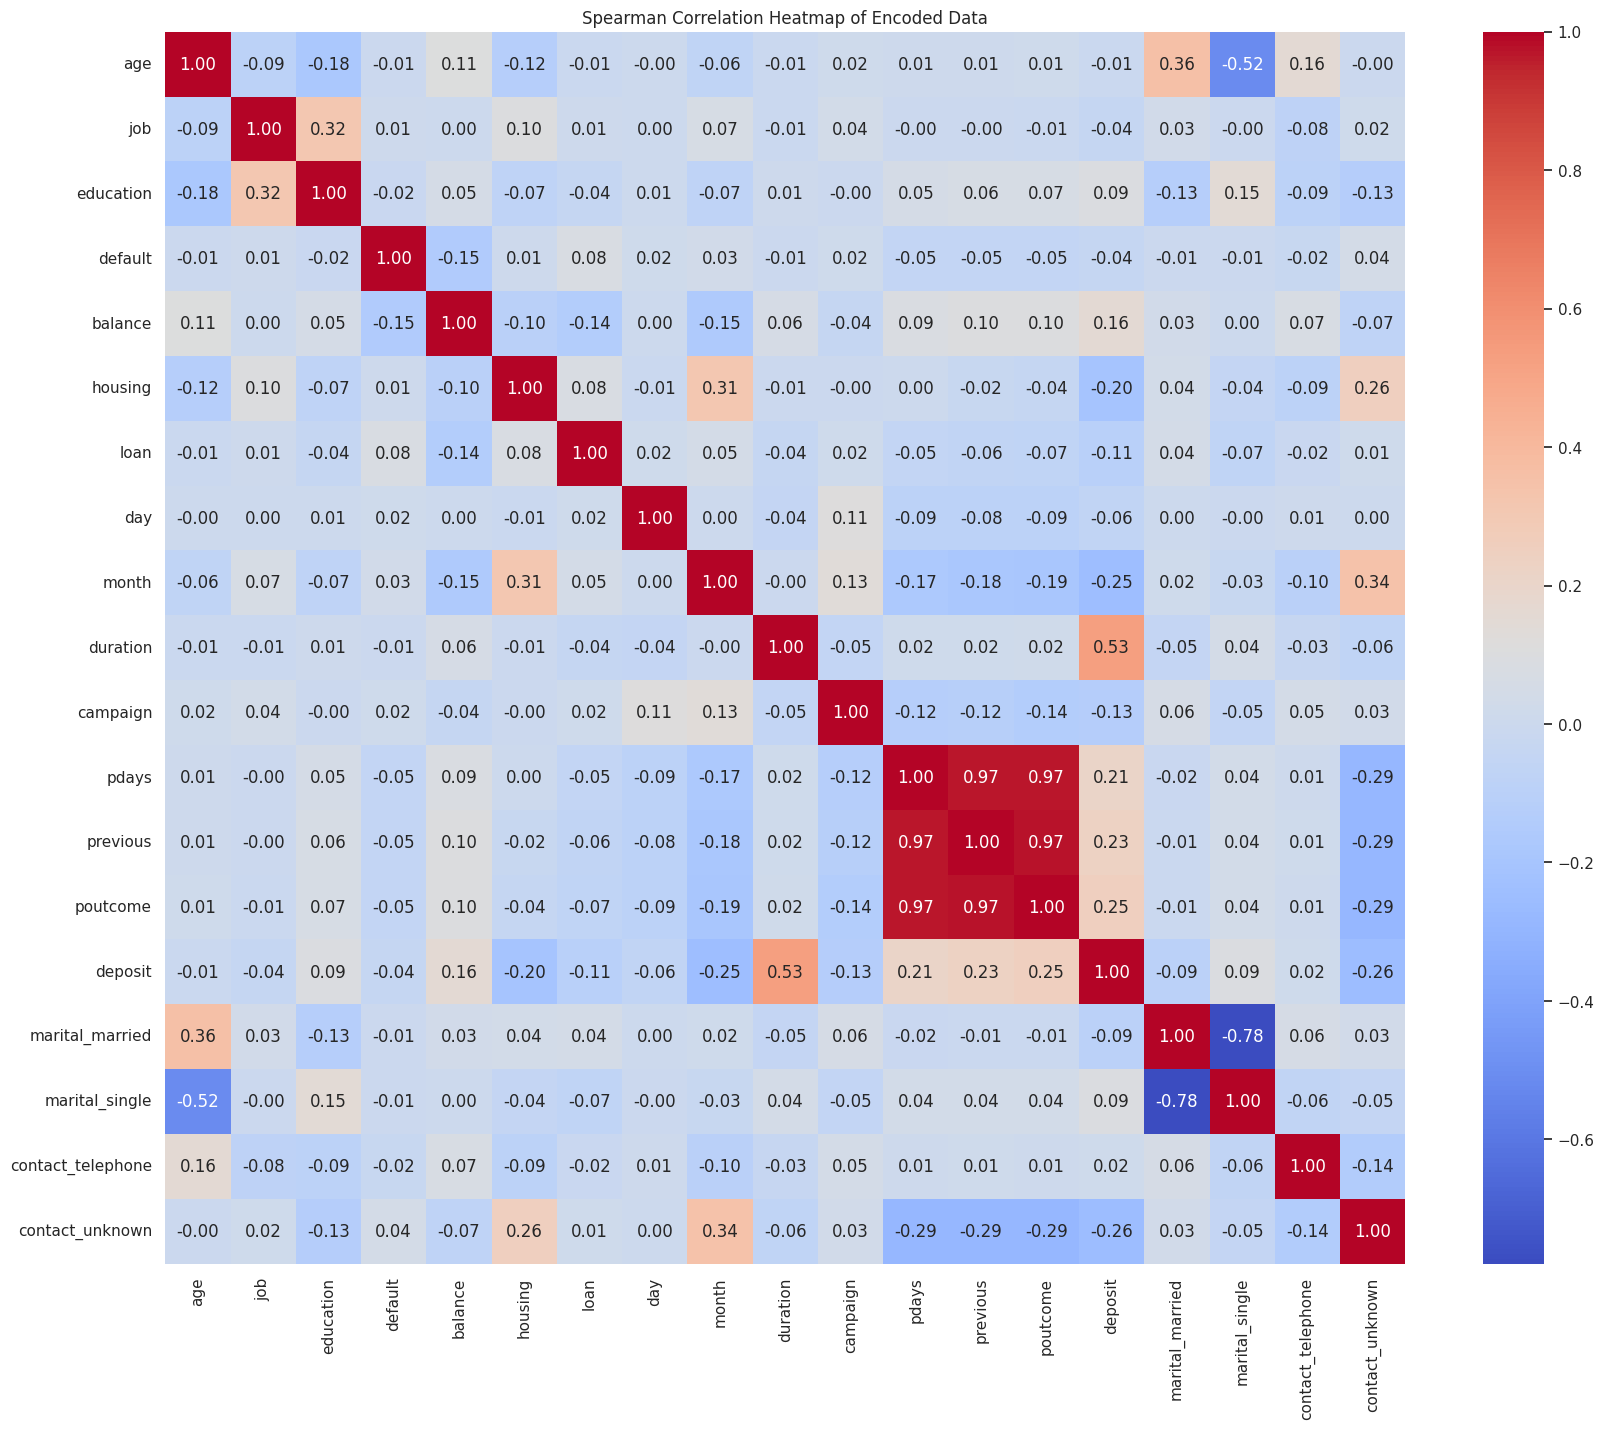


Highly correlated features (absolute Spearman correlation > 0.8):
previous - pdays: 0.97
poutcome - pdays: 0.97
poutcome - previous: 0.97


In [ ]:
# Calculate Spearman correlation matrix
corr_spearman = df_encoded.corr(method='spearman')

# Generate heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap of Encoded Data')
plt.show()

# Find highly correlated features (absolute correlation > 0.8)
threshold = 0.8
highly_correlated_features = set()
for i in range(len(corr_spearman.columns)):
    for j in range(i):
        if abs(corr_spearman.iloc[i, j]) > threshold:
            colname_i = corr_spearman.columns[i]
            colname_j = corr_spearman.columns[j]
            highly_correlated_features.add(f"{colname_i} - {colname_j}: {corr_spearman.iloc[i, j]:.2f}")

print("\nHighly correlated features (absolute Spearman correlation > 0.8):")
for feature_pair in highly_correlated_features:
    print(feature_pair)

4. Handling Multicollinearity

Based on the Spearman correlation analysis, the following pairs of features are highly correlated (absolute correlation > 0.8):
- pdays - previous
- pdays - poutcome
- previous - poutcome

To address multicollinearity, one feature from each highly correlated pair should be removed. In this case, since all three features are highly correlated with each other, removing 'pdays' and 'previous' will address the issue. 'poutcome' will be kept as it represents the outcome of the previous marketing campaign, which is likely important for the prediction task.

In [ ]:
df_processed = df_encoded.drop(['pdays', 'previous'], axis=1)

display(df_processed.head())

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,poutcome,deposit,marital_married,marital_single,contact_telephone,contact_unknown
0,59,0.119513,2,0,2343,1,0,5,0.253001,1042,1,0,1,1,0,0,1
1,56,0.119513,2,0,45,0,0,5,0.253001,1467,1,0,1,1,0,0,1
2,41,0.163322,2,0,1270,1,0,5,0.253001,1389,1,0,1,1,0,0,1
3,55,0.082691,2,0,2476,1,0,5,0.253001,579,1,0,1,1,0,0,1
4,54,0.119513,3,0,184,0,0,5,0.253001,673,2,0,1,1,0,0,1


In [ ]:
# Check for low variance features
variances = df_processed.var()
print("Feature variances:")
print(variances)

threshold = 0.01

# Identify features with low variance
low_variance_features = variances[variances < threshold].index.tolist()

print(f"\nFeatures with variance below {threshold}:")
print(low_variance_features)

# Drop low variance features from the DataFrame
df_processed_cleaned = df_processed.drop(columns=low_variance_features)

print("\nDataFrame after dropping low variance features:")
display(df_processed_cleaned.head())

Feature variances:
age                  1.419284e+02
job                  4.752436e-03
education            6.315799e-01
default              1.482586e-02
balance              1.040329e+07
housing              2.493000e-01
loan                 1.137022e-01
day                  7.090885e+01
month                5.798195e-03
duration             1.204981e+05
campaign             7.409704e+00
poutcome             1.042694e+00
deposit              2.493380e-01
marital_married      2.452632e-01
marital_single       2.158596e-01
contact_telephone    6.453982e-02
contact_unknown      1.660177e-01
dtype: float64

Features with variance below 0.01:
['job', 'month']

DataFrame after dropping low variance features:


,age,education,default,balance,housing,loan,day,duration,campaign,poutcome,deposit,marital_married,marital_single,contact_telephone,contact_unknown
0,59,2,0,2343,1,0,5,1042,1,0,1,1,0,0,1
1,56,2,0,45,0,0,5,1467,1,0,1,1,0,0,1
2,41,2,0,1270,1,0,5,1389,1,0,1,1,0,0,1
3,55,2,0,2476,1,0,5,579,1,0,1,1,0,0,1
4,54,3,0,184,0,0,5,673,2,0,1,1,0,0,1


In [ ]:
df_processed_cleaned.to_csv('bank_processed.csv', index=False)

print("Processed DataFrame saved to 'bank_processed.csv")

Processed DataFrame saved to 'bank_processed.csv
